In [33]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip show keras

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [3]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


#### import dataset

In [4]:
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()

In [5]:
print((x_train.shape, y_train.shape))

((60000, 28, 28), (60000,))


In [6]:
print((x_test.shape, y_test.shape))

((10000, 28, 28), (10000,))


In [7]:
# presenting one sample of data
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

ploting the 6 first images

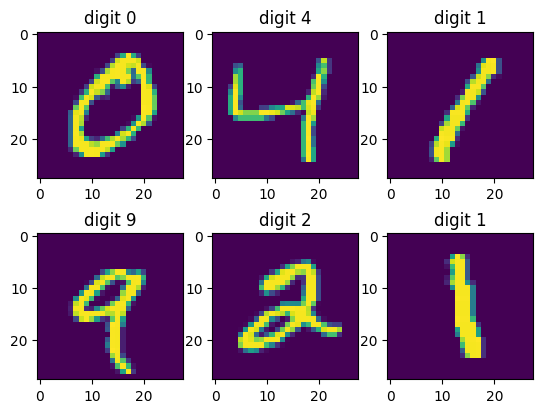

In [8]:
for i in range(1, 7):
  plt.subplot(2, 3, i)
  plt.imshow(x_train[i])
  plt.title(f"digit {y_train[i]}")

plt.show()

flatten the dataset

In [9]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


scalling data

In [10]:
x_train= x_train/255
x_test= x_test/255

In [11]:
x_train_flattened= x_train.reshape(len(x_train), 28*28)
x_test_flattened= x_test.reshape(len(x_test), 28*28)

In [12]:
print(x_train_flattened.shape, x_test_flattened.shape)

(60000, 784) (10000, 784)


### create the neural network

In [49]:
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(10, activation= 'sigmoid')
])

model.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ["accuracy"]
)
model.fit(x_train, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2714 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1259 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0874 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0668 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0521 - accuracy: 0.9836


In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0794 - accuracy: 0.9751


[0.07943497598171234, 0.9750999808311462]

 #### taste the module

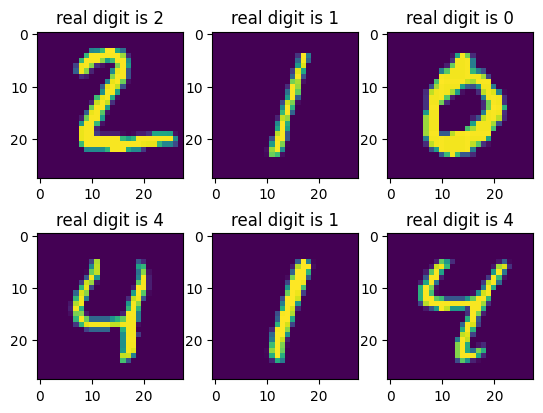

In [53]:
for i in range(1, 7):
  plt.subplot(2, 3, i)
  plt.imshow(x_test[i])
  plt.title(f"real digit is {y_test[i]}")

plt.show()

In [54]:
prediction= model.predict(x_test)

313/313 [==============================] - 2s 4ms/step


In [55]:
for i in range(1, 7):
  print(f"the predicted digit is {np.argmax(prediction[i])}")

the predicted digit is 2
the predicted digit is 1
the predicted digit is 0
the predicted digit is 4
the predicted digit is 1
the predicted digit is 4


In [56]:
prediction_labels= [np.argmax(i) for i in prediction]

In [57]:
cm= tf.math.confusion_matrix(labels= y_test, predictions= prediction_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    0,    1,    1,    1,    1,    5,    0],
       [   0, 1121,    4,    1,    0,    0,    1,    0,    8,    0],
       [   1,    1, 1007,    6,    1,    0,    1,    4,   11,    0],
       [   0,    0,    1,  991,    2,    3,    0,    4,    7,    2],
       [   2,    0,    1,    0,  970,    0,    2,    1,    1,    5],
       [   2,    0,    0,   20,    2,  850,    1,    1,   15,    1],
       [   7,    3,    0,    1,    2,    4,  931,    0,   10,    0],
       [   1,    6,   11,    5,    3,    1,    0,  989,    4,    8],
       [   4,    0,    3,    5,    0,    0,    0,    2,  958,    2],
       [   3,    5,    0,    7,   13,    3,    0,    5,    9,  964]],
      dtype=int32)>

Text(120.72222222222221, 0.5, 'truth')

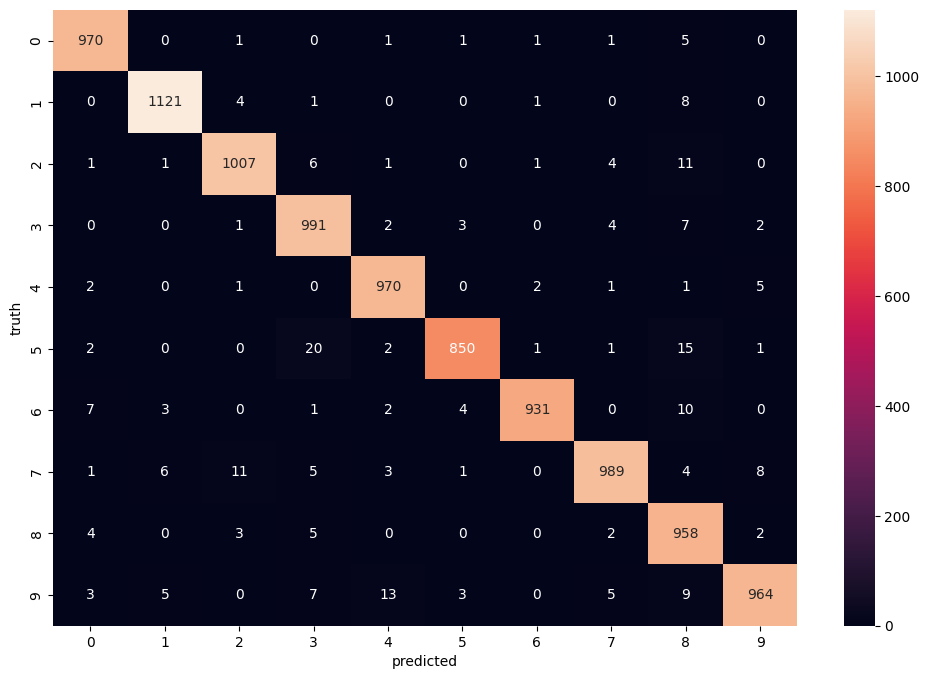

In [58]:
plt.figure(figsize= (12, 8))
sns.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('predicted')
plt.ylabel("truth")